In [3]:
from gcpds.utils import loaddb
from matplotlib import pyplot as plt
from matplotlib import lines
import numpy as np
from IPython.display import display, Markdown, Latex
import markdown_table

# plt.style.use('seaborn')
plt.style.use('ggplot')


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Databases

In [4]:
def build_paradigm(title, data):
    ax = plt.subplot(111)
    ax = plt.axes(frameon=False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.axes.get_yaxis().set_visible(False)

#     xmin, xmax = -2, 5
#     ax.add_artist(lines.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))

    Y = 1
    ticks = []
    extra = []
    alpha = 1

    if 'fixation' in data:
        plt.fill_between(data['fixation'], [Y, Y], 0.1, color='C0', alpha=alpha)
        plt.annotate('Fixation', (np.mean(data['fixation']), Y/2), ha='center', color='w', fontsize=17)
        ticks.extend(data['fixation'])

    if 'cue' in data:
        plt.fill_between(data['cue'], [Y*1.3, Y*1.3], 0.1, color='C2', alpha=alpha)
        plt.annotate('Cue', (data['cue'][0]+0.1, Y*1.3-0.15), ha='left', va='center', color='w', fontsize=17)
        ticks.extend(data['cue'])

    if 'mi' in data:
        plt.fill_between(data['mi'], [Y, Y], 0.1, color='C1', alpha=alpha)
        plt.annotate('Motor imagery', (np.mean(data['mi']), Y/2), ha='center', color='w', fontsize=17)
        ticks.extend(data['mi'])

    if 'rest' in data:
        plt.fill_between(data['rest'], [Y, Y], 0.1, color='C3', alpha=alpha)
        plt.annotate('Rest', (np.mean(data['rest']), Y/2), ha='center', color='w', fontsize=17)
        ticks.extend(data['rest'])

    if 'inter_trials' in data:
        plt.fill_between(data['inter_trials'][0], [Y, Y], 0.1, color='C3', alpha=0.5)
        plt.annotate(f'Inter trials\n{data["inter_trials"][1]}', (np.mean(data['inter_trials'][0])-0.1, Y/2), ha='center', va='center', color='w', fontsize=14, rotation=90)
        extra.extend(data['inter_trials'][0])
        
    if 'custom' in data:
        for p, label, color in  data['custom']:
            plt.fill_between(p, [Y, Y], 0.1, color=color, alpha=alpha)
            plt.annotate(label, (np.mean(p), Y/2), ha='center', color='w', fontsize=17)
            ticks.extend(p)
        

#     plt.title(title)

    plt.xticks(list(set(ticks)))
    
    xmin, xmax = min(ticks), max(ticks+extra)
    ax.add_artist(lines.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))

    plt.xlim(xmin, xmax)
    
    if 'cue' in data:
        plt.ylim(0, Y*1.4)
    else:
        plt.ylim(0, Y*1.1)
    

    plt.xlabel('Time [s]')

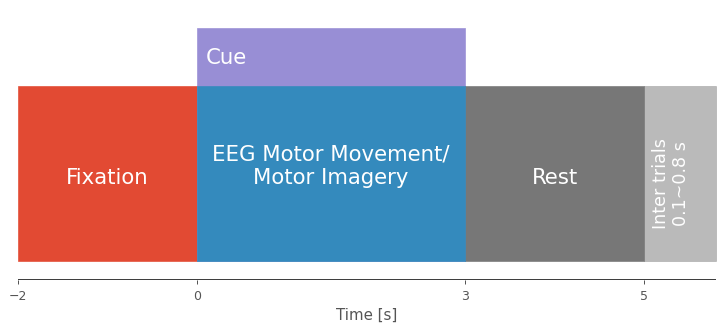

In [10]:
data = {
    
    'fixation': [-2, 0],
#     'mi': [0, 3],
    'cue': [0, 3],
    'rest': [3, 5],
    'inter_trials': ([5, 5.8], '0.1~0.8 s'),
    'custom': [([0, 3], 'EEG Motor Movement/\nMotor Imagery', 'C1'),
              ],
    
}

fig = plt.figure(figsize=(10, 4), dpi=90)
build_paradigm('GIGA', data)
fig.savefig('../images/giga.png')

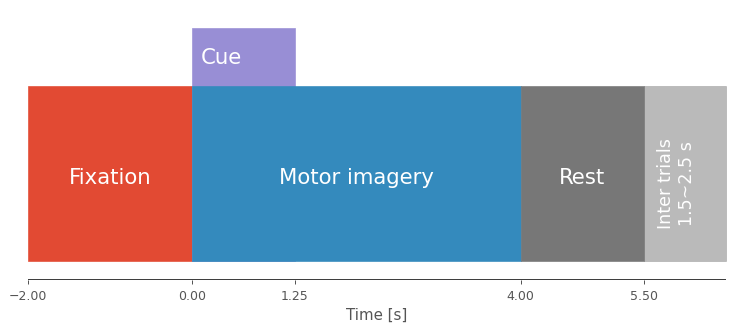

In [5]:
data = {
    
    'fixation': [-2, 0],
    'mi': [0, 4],
    'cue': [0, 1.25],
    'rest': [4, 5.5],
    'inter_trials': ([5.5, 6.5], '1.5~2.5 s'),
    
}

fig = plt.figure(figsize=(10, 4), dpi=90)
build_paradigm('BCI2a', data)
fig.savefig('../images/bci2a.png')

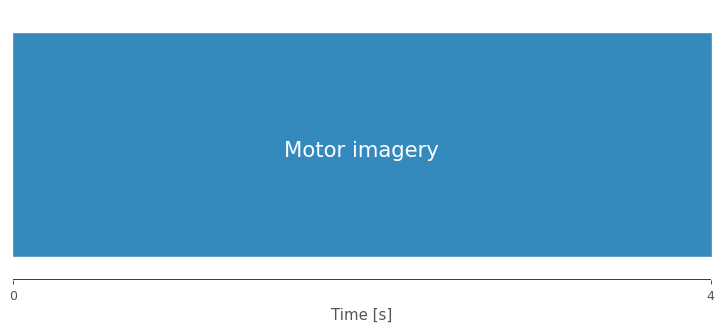

In [6]:
data = {
    
    'mi': [0, 4],
    
}

fig = plt.figure(figsize=(10, 4), dpi=90)
build_paradigm('HighGamma', data)
fig.savefig('../images/highgamma.png')

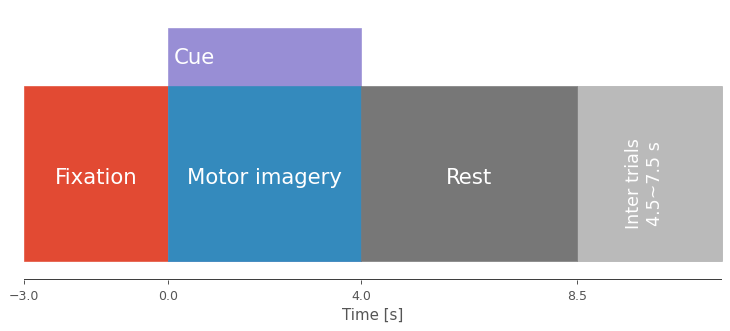

In [7]:
data = {
    
    'fixation': [-3, 0],
    'mi': [0, 4],
    'cue': [0, 4],
    'rest': [4, 8.5],
    'inter_trials': ([8.5, 11.5], '4.5~7.5 s'),
    
}

fig = plt.figure(figsize=(10, 4), dpi=90)
build_paradigm('BCI illiteracy - MI', data)
fig.savefig('../images/illiteracy_mi.png')

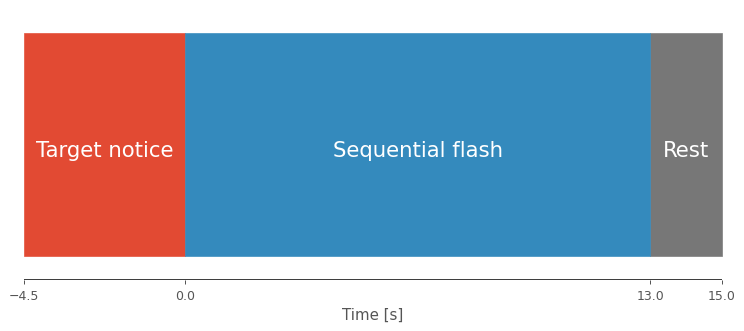

In [8]:
data = {
    
    'custom': [([-4.5, 0], 'Target notice', 'C0'),
               ([0, 13], 'Sequential flash', 'C1'),],
    'rest': [13, 15],
    
}

fig = plt.figure(figsize=(10, 4), dpi=90)
build_paradigm('BCI illiteracy - ERP', data)
fig.savefig('../images/illiteracy_erp.png')

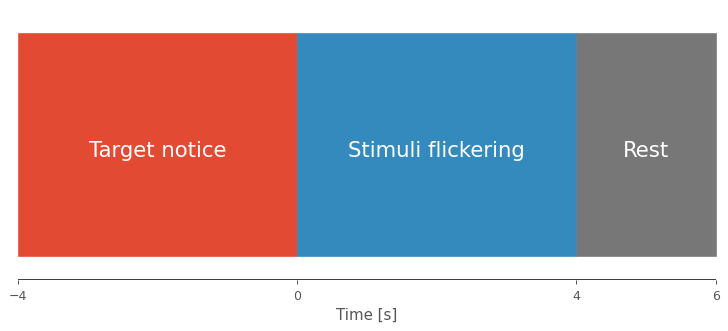

In [9]:
data = {
    
    'custom': [([-4, 0], 'Target notice', 'C0'),
               ([0, 4], 'Stimuli flickering', 'C1'),],
    'rest': [4, 6],
    
}

fig = plt.figure(figsize=(10, 4), dpi=90)
build_paradigm('BCI illiteracy - SSVEP', data)
fig.savefig('../images/illiteracy_ssvep.png')

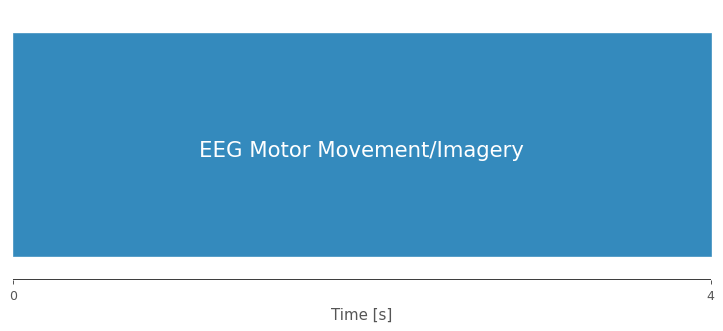

In [14]:
data = {
    'custom': [([0, 4], 'EEG Motor Movement/Imagery', 'C1'),
              ],
}

fig = plt.figure(figsize=(10, 4), dpi=90)
build_paradigm('Physionet', data)
fig.savefig('../images/physionet.png')

In [10]:
show = lambda table:display(Markdown(str(table)))

In [11]:
columns = ["Database", "Montage", 'Sample rate', 'Channels', 'Classes', 'Subjects']

matrix = []
args = ['montage', 'sampling_rate']

databases = (
    ['GIGA', loaddb.GIGA],
    ['BCI2a', loaddb.BCI2a],
    ['HighGamma', loaddb.HighGamma],
    ['BCI illiteracy - MI', loaddb.BCIilliteracy_MI],
    ['BCI illiteracy - SSVEP', loaddb.BCIilliteracy_SSVEP],
    ['BCI illiteracy - ERP', loaddb.BCIilliteracy_ERP],
    ['Physionet - MM/MI', loaddb.PhysionetMMI],
)

for name, cls_ in databases:    
    matrix.append([
        name,
        cls_.metadata['montage'].replace('_', ' ').capitalize(),  
        str(f"{cls_.metadata['sampling_rate']} Hz"),  
        str(len(cls_.metadata['channel_names'])), 
        str(len(cls_.metadata['classes'])),
        str(cls_.metadata['subjects']),
    ])
    
    
table = markdown_table.Table(columns, matrix)
show(table)
print(str(table))

Database|Montage|Sample rate|Channels|Classes|Subjects
-|-|-|-|-|-
GIGA |Standard 1005 |512 Hz |64 |2 |52
BCI2a |Standard 1020 |250 Hz |22 |4 |9
HighGamma |Standard 1005 |500 Hz |133 |4 |14
BCI illiteracy - MI |Standard 1020 |1000 Hz |62 |2 |54
BCI illiteracy - SSVEP |Standard 1020 |1000 Hz |62 |4 |54
BCI illiteracy - ERP |Standard 1020 |1000 Hz |62 |2 |54
Physionet - MM/MI |Standard 1005 |160 Hz |64 |8 |109

Database|Montage|Sample rate|Channels|Classes|Subjects
-|-|-|-|-|-
GIGA |Standard 1005 |512 Hz |64 |2 |52
BCI2a |Standard 1020 |250 Hz |22 |4 |9
HighGamma |Standard 1005 |500 Hz |133 |4 |14
BCI illiteracy - MI |Standard 1020 |1000 Hz |62 |2 |54
BCI illiteracy - SSVEP |Standard 1020 |1000 Hz |62 |4 |54
BCI illiteracy - ERP |Standard 1020 |1000 Hz |62 |2 |54
Physionet - MM/MI |Standard 1005 |160 Hz |64 |8 |109


In [26]:
763/13

58.69230769230769